<a href="https://colab.research.google.com/github/CodedByAravind/Linear-Regression-Model/blob/main/Linear_Reg_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Model


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.8.0+cu126'

In [2]:
#parameters
weight = 0.6
bias = 0.4

#Create Data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

In [3]:
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train)

(40, 40)

In [4]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test, predictions=None):
  plt.figure(figsize=(8, 5))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size":10})

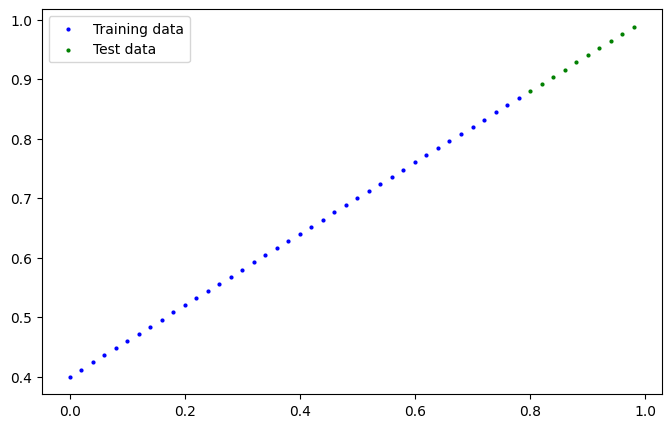

In [5]:
plot_predictions()

In [6]:
#Create linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad = True))

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad = True))

  def forward(self, x):
    return self.weights * x + self.bias

In [16]:
torch.manual_seed(50)

model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weights', tensor([0.4625])), ('bias', tensor([-0.1692]))])

In [17]:
#making predictions

with torch.inference_mode():
  y_preds = model(X_test)

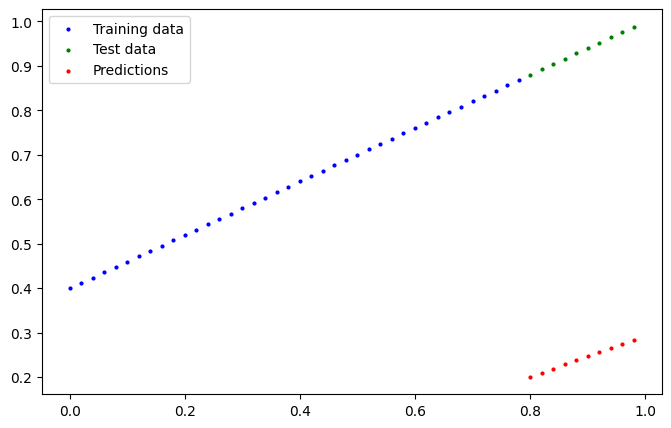

In [18]:
plot_predictions(predictions = y_preds)

In [19]:
#Create loss func
loss_func = nn.L1Loss()

#Create optimizer
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.001)

In [27]:
torch.manual_seed(50)
epochs = 500

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  #Put model in training mode
  model.train()

  #Forward pass
  y_pred = model(X_train)

  #Calculate loss
  loss = loss_func(y_pred, y_train)

  #Optimizer zero gradient
  optimizer.zero_grad()

  #Loss backward
  loss.backward()

  #Progress the optimizer
  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_pred = model(X_test)

    test_loss = loss_func(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | MAE Train Loss: 0.5076362490653992 | MAE Test Loss: 0.5555437803268433 
Epoch: 10 | MAE Train Loss: 0.49611520767211914 | MAE Test Loss: 0.5420728921890259 
Epoch: 20 | MAE Train Loss: 0.48459428548812866 | MAE Test Loss: 0.5286019444465637 
Epoch: 30 | MAE Train Loss: 0.4730733335018158 | MAE Test Loss: 0.5151310563087463 
Epoch: 40 | MAE Train Loss: 0.46155238151550293 | MAE Test Loss: 0.5016601085662842 
Epoch: 50 | MAE Train Loss: 0.45003142952919006 | MAE Test Loss: 0.488189160823822 
Epoch: 60 | MAE Train Loss: 0.4385104179382324 | MAE Test Loss: 0.47471824288368225 
Epoch: 70 | MAE Train Loss: 0.42698946595191956 | MAE Test Loss: 0.4612472951412201 
Epoch: 80 | MAE Train Loss: 0.4154684543609619 | MAE Test Loss: 0.44777631759643555 
Epoch: 90 | MAE Train Loss: 0.40394750237464905 | MAE Test Loss: 0.4343053698539734 
Epoch: 100 | MAE Train Loss: 0.3924264907836914 | MAE Test Loss: 0.4208344519138336 
Epoch: 110 | MAE Train Loss: 0.3809055685997009 | MAE Test Loss: 0.40

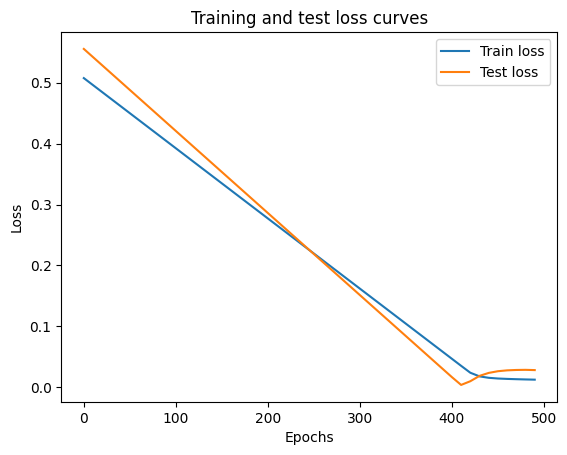

In [28]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [29]:
print(model.state_dict())
print(f"weight = {weight}, bias = {bias}")

OrderedDict({'weights': tensor([0.6605]), 'bias': tensor([0.3741])})
weight = 0.6, bias = 0.4


In [30]:
model.eval()

with torch.inference_mode():
  y_res = model(X_test)

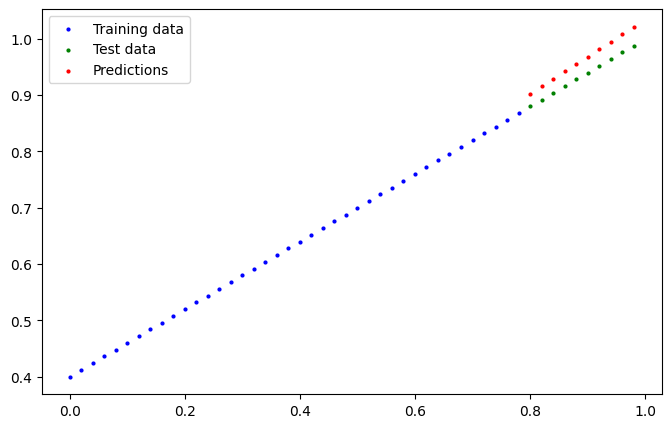

In [31]:
plot_predictions(predictions = y_res)